In [1]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploración de datos

In [2]:
# Importamos el dataset raw (Food_Delivery_Times.csv)
df = pd.read_csv("../data/raw.csv")

In [3]:
# Observamos el contenido del dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


None

In [4]:
# Inspección general del dataset
display(df.head())
display(df.tail())
display(df.describe())

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [ ]:
# Inspección de varaibles categoricas
display(df.describe(exclude=("int", "float")))

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
count,970,970,970,1000
unique,5,3,4,3
top,Clear,Medium,Morning,Bike
freq,470,390,308,503


**Observaciones**

Valores ausentes:
Se detectan valores nulos en algunas columnas del conjunto de datos. Estos serán tratados en etapas posteriores mediante imputación.

Distribución y simetría:
Las variables categóricas muestran una distribución equilibrada. En el caso de las variables numéricas, la proximidad entre la media y la mediana sugiere distribuciones simétricas en general.

Rango y dispersión:
No se observan valores extremos evidentes en los rangos de las variables numéricas, lo que indica una dispersión razonable de los datos.

Posibles errores lógicos:
No se han identificado valores anómalos o inconsistencias lógicas (como valores negativos donde no corresponde), lo cual sugiere una buena calidad inicial del dataset.

In [4]:
# Verificamos valores nulos
display(df.isnull().sum())

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

Dadido a que existen valores nulos en el dataset, realizaremos un conteo total de estos para evaluar su impacto sobre el conjunto de datos. Esta información nos permitirá tomar decisiones informadas sobre el tratamiento más adecuado, ya sea imputación o eliminación, según el grado de afectación.

In [5]:
# Sumaremos la totalidad de los valores nulos
total_nulos = df.isnull().sum().sum()
total_celdas = df.size
porcentaje = (total_nulos / total_celdas) * 100
print(f"Nulos totales: {total_nulos} ({porcentaje:.2f}%)")

Nulos totales: 120 (1.33%)


Durante la inspección de calidad de los datos, se identificaron 120 valores nulos, lo que representa aproximadamente el 1.33% del total de entradas del dataset. Este porcentaje es relativamente bajo y no representa una amenaza significativa para la integridad del análisis o los modelos que se construyan posteriormente.

Para asegurar la consistencia de los datos y evitar pérdida de información, se procederá a imputar los valores faltantes utilizando las siguientes estrategias:

Variables numéricas: serán imputadas utilizando la media de cada columna.

Variables categóricas: serán imputadas utilizando la moda, es decir, el valor más frecuente.

Este enfoque permite conservar la mayor cantidad posible de datos sin introducir sesgos importantes, manteniendo así la representatividad del conjunto.

In [6]:
# Imputaremos de manera estadística

# Variables categóricas
df["Weather"] = df["Weather"].fillna(df["Weather"].mode()[0])
df["Traffic_Level"] = df["Traffic_Level"].fillna(df["Traffic_Level"].mode()[0])
df["Time_of_Day"] = df["Time_of_Day"].fillna(df["Time_of_Day"].mode()[0])

# Variables numéricas
df["Courier_Experience_yrs"] = df["Courier_Experience_yrs"].fillna(df["Courier_Experience_yrs"].mean())

In [7]:
# Confirmamos la cantidad de valores nulos en el Dataframe
display(df.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

In [8]:
# Verificamos valors duplicados
print(f"Total de valores duplicados: {df.duplicated().sum()}")

Total de valores duplicados: 0


## Vizualización de nuestros datos

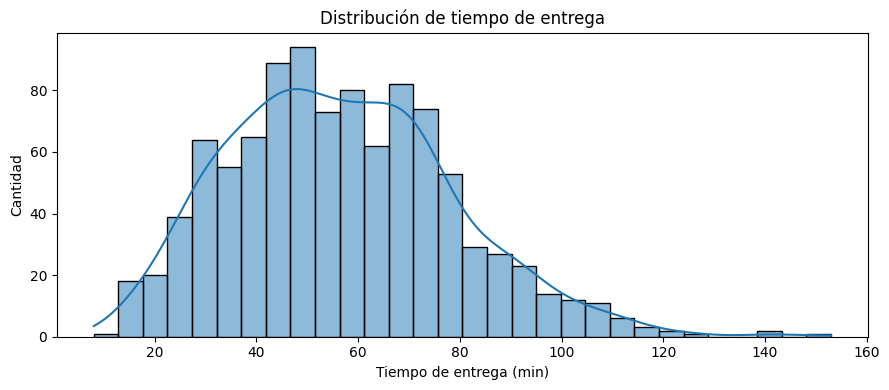

In [107]:
# Vizualización de distribucione por tiempo de entrega
plt.figure(figsize=(9, 4))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True)
plt.xlabel("Tiempo de entrega (min)")
plt.ylabel("Cantidad")
plt.title("Distribución de tiempo de entrega")
plt.tight_layout()
plt.show()

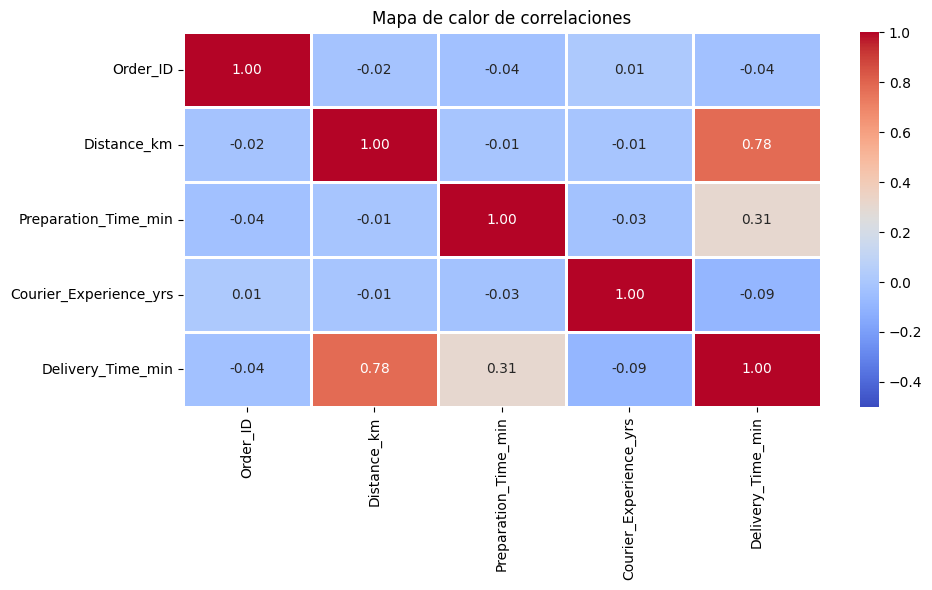

In [81]:
# Análisis de correlación

# Creación de filtros de columnas
df_column_num = df.select_dtypes(include=("int", "float"))
df_column_obj = df.select_dtypes(include=("object"))

plt.figure(figsize=(10, 6))
sns.heatmap(df_column_num.corr(), annot=True, cmap="coolwarm", fmt=".2f", vmin=-0.5, vmax=1, linewidths=1)
plt.title("Mapa de calor de correlaciones")
plt.tight_layout()
plt.show()

**Observiaciones**

Delivery_Time_min muestra una alta correlación positiva con Distance_km (r = 0.78). Esta relación es consistente con el comportamiento esperado: a mayor distancia, mayor será el tiempo de entrega. Esta variable será clave en el modelado predictivo.

Preparation_Time_min presenta una correlación moderada con Delivery_Time_min (r = 0.31), lo cual sugiere que el tiempo requerido para preparar el pedido también influye en el total de la entrega, aunque en menor medida.

El resto de las variables numéricas presentan correlaciones débiles o cercanas a cero con la variable objetivo, lo que indica relaciones lineales poco significativas. No obstante, estas variables podrían aportar valor a través de relaciones no lineales o interacciones.

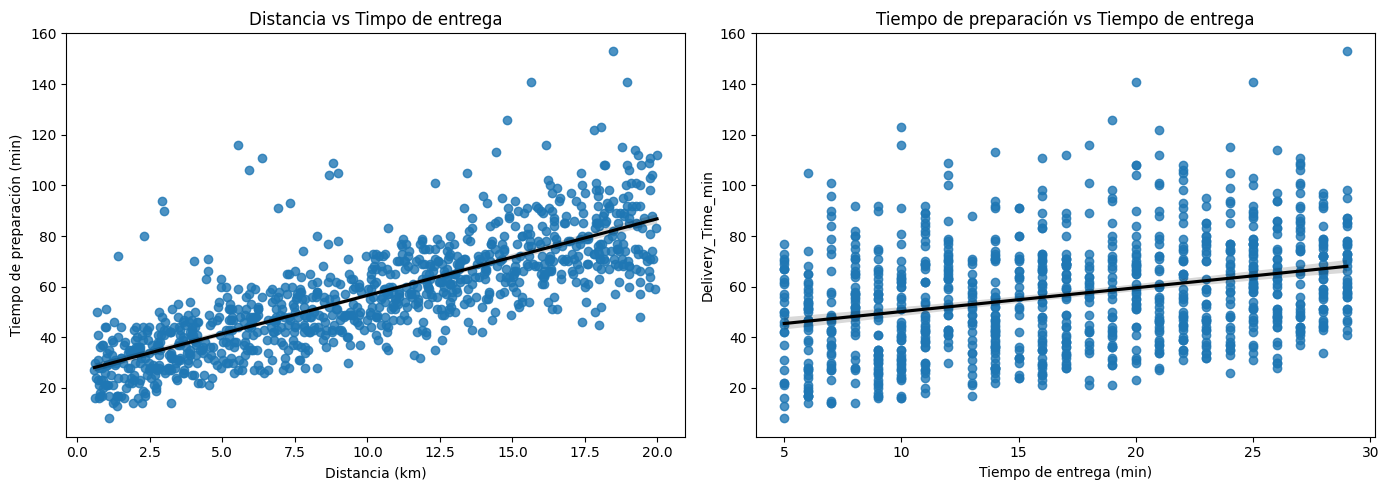

In [106]:
# Visualización de variables con mayor correlación
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.regplot(ax=axes[0], data=df, x='Distance_km', y='Delivery_Time_min', line_kws={"color": "black"})
axes[0].set_title("Distancia vs Timpo de entrega")
axes[0].set_xlabel("Distancia (km)")
axes[0].set_ylabel("Tiempo de entrega (min)")

sns.regplot(ax=axes[1], data=df, x="Preparation_Time_min", y="Delivery_Time_min", line_kws={"color": "black"})
axes[1].set_title("Tiempo de preparación vs Tiempo de entrega")
axes[1].set_xlabel("Tiempo de entrega (min)")
axes[0].set_ylabel("Tiempo de preparación (min)")
plt.tight_layout()
plt.show()

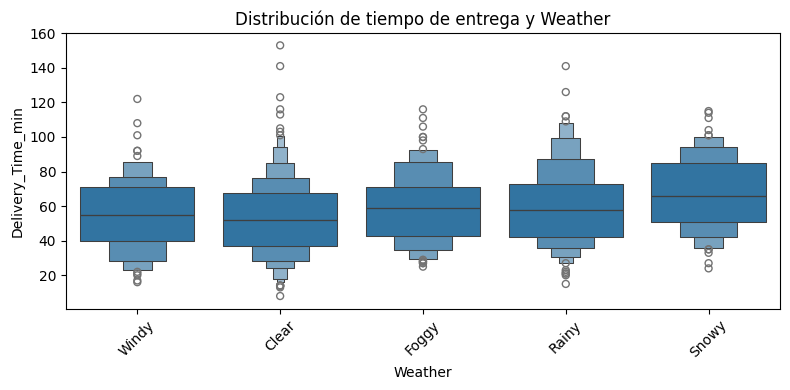

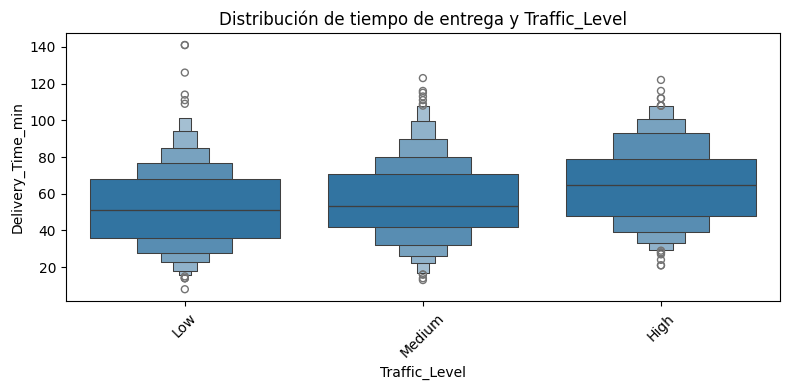

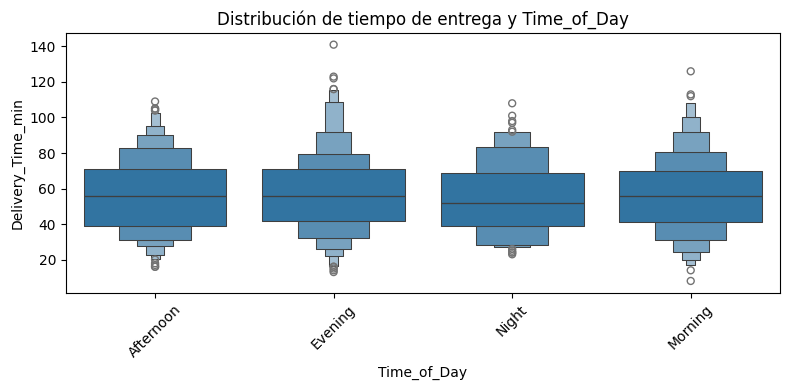

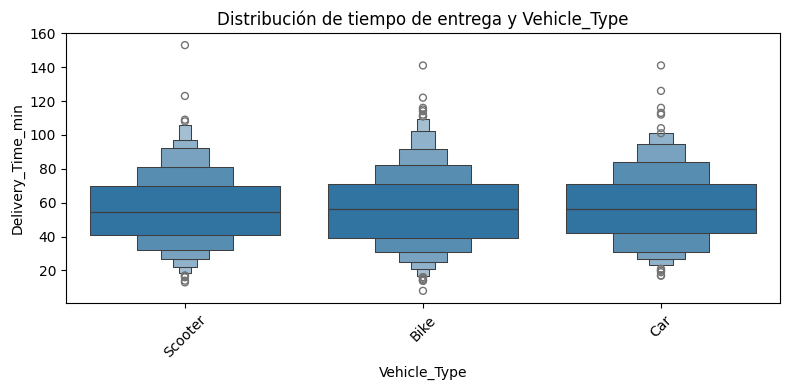

In [80]:
# Creación de boxplots de Delivery_Time_min y varaibles categóricas
for col in df_column_obj:
    plt.figure(figsize=(8, 4))
    sns.boxenplot(data=df, x=col, y="Delivery_Time_min")
    plt.title(f"Distribución de tiempo de entrega y {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

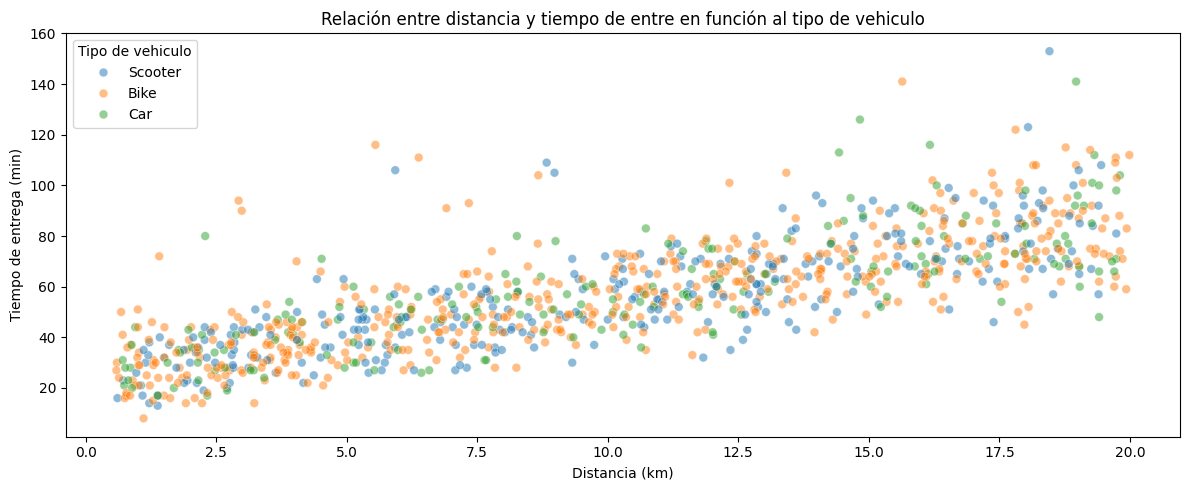

In [183]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x="Distance_km", y="Delivery_Time_min", hue="Vehicle_Type", alpha=0.5, s=40)
plt.title("Relación entre distancia y tiempo de entre en función al tipo de vehiculo")
plt.xlabel("Distancia (km)")
plt.ylabel("Tiempo de entrega (min)")
plt.legend(title="Tipo de vehiculo")
plt.tight_layout()
plt.show()